In [26]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans


Datasets: Iris e MNIST
===

(150, 4)


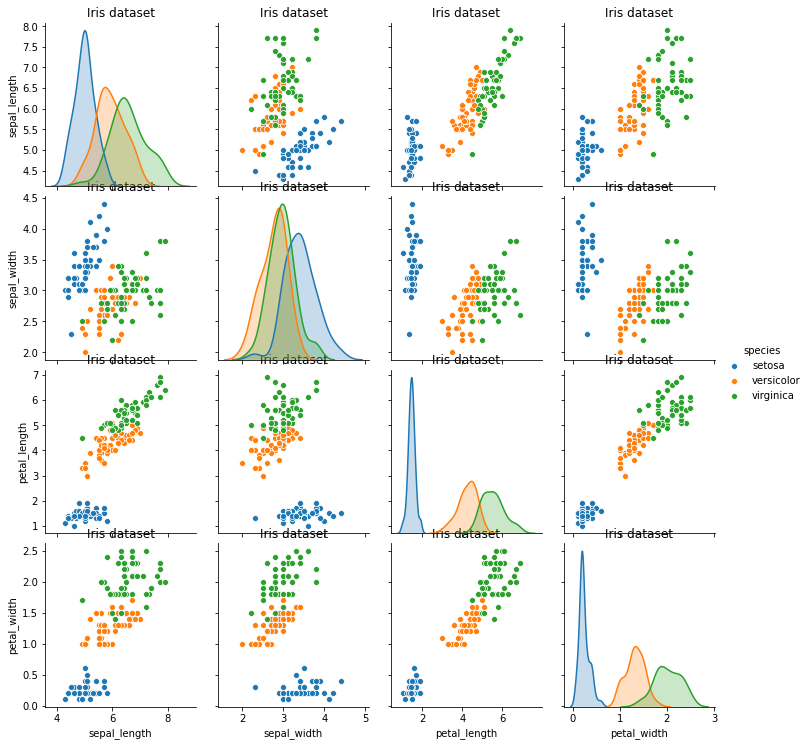

In [41]:
#Iris
iris= pd.read_csv('iris.cvs')
fig = sb.pairplot(iris, hue = 'species') 
# print(iris_data)
#copy data with no labels
iris_data = iris.drop(['species'], axis=1, inplace = False)
# print(iris_data)

data = iris_data.values
print(data.shape)
plt.show()

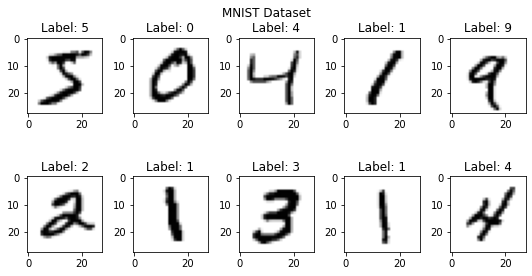

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [14]:
#MNIST

#Separando valores de treino e de teste
(x_treino, y_treino), (x, y) = mnist.load_data()

# pick a sample to plot
# sample = 1
# image = x_treino[sample]

# fig = plt.figure
# plt.imshow(image, cmap='gray_r')
# plt.show()
num = 10
images = x_treino[:num]
labels = y_treino[:num]
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
fig.suptitle("MNIST Dataset")
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

print('MNIST Dataset Shape:')
print('X_train: ' + str(x_treino.shape))
print('Y_train: ' + str(y_treino.shape))
print('X_test:  '  + str(x.shape))
print('Y_test:  '  + str(y.shape))


Projeto 4: SOM 
===

Falta:
Revisar a função update_weights aquela definição de raio é meio estranha

Created cortex layer with shape: (100, 100, 28, 28) 

Trained epoch


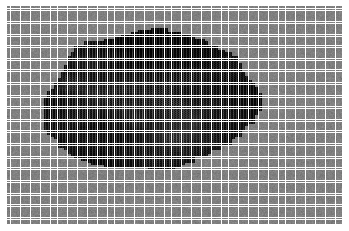

In [42]:
class SOM:
    def __init__(self, input_size=28, dim=(100,100
                                            []), radius=2, alpha = 0.05, epochs = 1):
        self.dim = dim
        self.input_size = input_size
        self.radius = int(radius)
        self.alpha = float(alpha)
        self.epochs = int(epochs)
        self.cortex = np.random.rand(self.dim[0], self.dim[1], self.input_size, self.input_size)
        self.cortex = np.reshape(self.cortex, (self.dim[0], self.dim[1], self.input_size, self.input_size))
        print("Created cortex layer with shape: %s \n" %(str(self.cortex.shape)))

    def train(self, x_train):
        point = [-1,-1]
        for vector in x_train:
            min_dist = np.Infinity
            for i in range(self.dim[0]):
                for j in range(self.dim[1]):
                    dist = np.sqrt(np.sum((vector.reshape(-1, self.input_size) - self.cortex[i][j]) ** 2))
                    if dist < min_dist:
                        min_dist = dist
                        point = [i, j]
            self.update_weights(point, vector)
        print('Trained epoch')
        
    def update_weights(self, point, vector):
        def isValidPoint(point):
            if point[0] < 0 or point[0] >= self.dim[0]:
                return False
            elif point[1] < 0 or point[1] >= self.dim[1]:
                return False
            return True
        
        x_diff = -self.radius
        
        # update the weights in the points inside the radius
        while x_diff <= self.radius:
            y_diff = -self.radius
            
            while y_diff <= self.radius:
                if isValidPoint([point[0]+x_diff, point[1]+y_diff]):
                    # update weights
                    delta = vector.reshape(-1, self.input_size) - self.cortex[point[0]+x_diff][point[1]+y_diff]
                    self.cortex[point[0]+x_diff][point[1]+y_diff] += self.alpha * delta
                y_diff += 1
            x_diff += 1
            
    def show(self):
        fig, axis = plt.subplots(self.dim[0], self.dim[1])
        plt.axis('off')
        plt.xticks(color='w')
        plt.yticks(color='w')

        for i in range(self.dim[0]):
            for j in range(self.dim[1]):
                axis[i, j].imshow(self.cortex[i][j], aspect='auto', cmap='gray')

        i=0
        for row in axis:
            j=0
            for columns in row:
                columns.imshow(self.cortex[i][j], aspect = 'auto', cmap='gray')
                columns.axis('off')
                j += 1
            i += 1
        plt.show()

# generating the SOM network
mnist_SOM = SOM()
mnist_SOM.train(x_treino)
mnist_SOM.show()

In [47]:
plt.savefig("out200.pdf", quality = 95)


<Figure size 432x288 with 0 Axes>

Projeto 5: K-means e K-nn
===


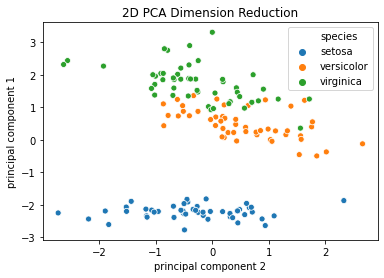

In [30]:
#Normalização dos dados e redução de dimensionalidade com o PCA:

#Normalização
x = StandardScaler().fit_transform(data)


#PCA
K = np.cov(x.T)
# print("Matriz de covariância K:\n %s\n"%K)
eigenvalues, eigenvectors = np.linalg.eig(K)

#sorting the values decreasing order
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Changing to the new base
principal_comp = []
for eigenvectorT in (eigenvectors.T):
    principal_comp.append(x.dot(eigenvectorT))
    
principal_comp = np.array(principal_comp)
# print(principal_comp.shape)
# Data = pd.DataFrame(data = principal_comp.T, columns=['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
# Data = pd.concat([Data, iris['species']], axis = 1)

# sb.pairplot(Data, hue = 'species')

Data_2D = pd.DataFrame(data = principal_comp[:2].T, columns=['principal component 1', 'principal component 2'])
Data_2D = pd.concat([Data_2D, iris['species']], axis = 1)
# sb.pairplot(Data_2D, hue = 'species')
sb.scatterplot(Data_2D['principal component 2'],Data_2D['principal component 1'], hue = Data_2D['species'])
plt.title("2D PCA Dimension Reduction")
plt.show()


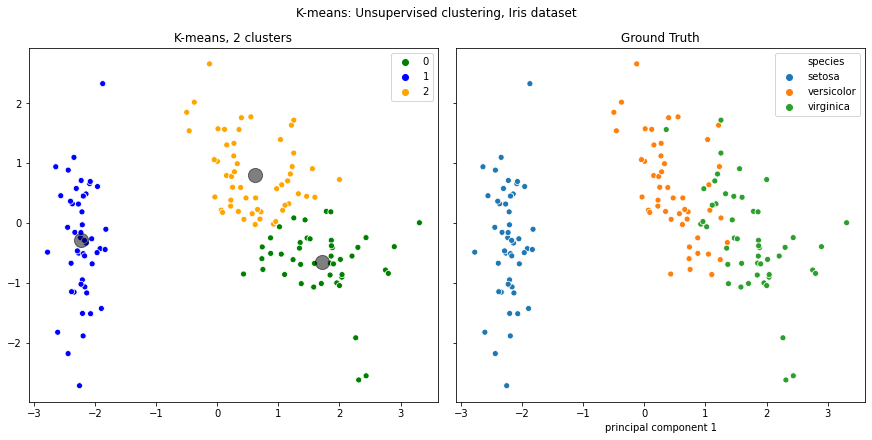

Matrix de Confusão:
[[11  0 39]
 [ 0 50  0]
 [34  0 16]]


In [38]:
#K-means
fig, ax = plt.subplots(1, 2,figsize=(6*2,6), sharex=True, sharey=True,constrained_layout=True)
fig.suptitle("K-means: Unsupervised clustering, Iris dataset")
X = Data_2D.iloc[:, 0:2].values
# print(X)
kms3 = KMeans(n_clusters=3)
kms3.fit(X)
cluster = kms3.predict(X)
sb.scatterplot(X[:, 0], X[:, 1], hue=cluster, ax = ax[0], palette= ['green', 'blue', 'orange' ])

centers = kms3.cluster_centers_
# print(cluster.shape)
ax[0].set_title("K-means, 2 clusters")
ax[0].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
ax[1].set_title("Ground Truth")
sb.scatterplot(Data_2D['principal component 1'],Data_2D['principal component 2'], ax = ax[1], hue = Data_2D['species'])
plt.show()

y_true = np.copy(Data_2D['species'])
y_true[y_true=='versicolor']= 0
y_true[y_true=='setosa']= 1
y_true[y_true=='virginica']= 2
y_true = np.array(y_true, dtype= 'int64')

print("Matrix de Confusão:")
print(confusion_matrix(y_true, cluster))